# Sampled video EDA
Just a short notebook to get a few insights into how the video database looks. 
Main objective is to get a feeling for the distribution of the views, likes and dislikes and how they correlate. 


In [62]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import fabulus

import pandas as pd
import src.eda.eda_util as eda_util
from src.preprocessing.indexer import Indexer

import os
%pwd
%matplotlib inline

In [63]:
WDIR = 'H:\\Workspaces\\Projects\\PR_data_science\\src\\eda'
os.chdir(WDIR+'\\..\\..')
os.getcwd()

'H:\\Workspaces\\Projects\\PR_data_science'

In [64]:
# Fetch the data
X_train, X_test, y_train, y_test = Indexer.load_split('cache/tts_42')
df = X_train.append(X_test)
y = y_train.append(y_test)
df = eda_util.get_metaframe(df)
df.rename(columns={0: 'v_id', 1: 'n_samples'}, inplace=True)  # Backwards compatibility
df['viewcounts'] = y

# Replacing NaN's with 0 as these videos have 0 likes/dislikes
# TODO maybe replace with -1 to distinguish with real 0. 
df.fillna(value=0, inplace=True) 



## General Overview

In [65]:
df.head()

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
912,cWGE9Gi0bB0,30,Shine On You Crazy Diamond Pt.2,Pink Floyd,303592.0,16612.0,802.0,4.792482,56844829
594,DumlIIHSrsQ,30,American Dream,Casting Crowns,8557.0,226.0,248.0,4.897074,2645372
564,qdOHPjMzY8s,30,The Boy With The Thorn In His Side,The Smiths,41534.0,850.0,185.0,4.919781,7154588
1822,5lVatZeQ68Y,30,Animals,Muse,1188.0,45.0,263.0,4.854014,175854
2019,S4ZWD_0VRK8,30,Wild World,Maxi Priest,53718.0,1992.0,215.0,4.856974,10029369


In [66]:
df.describe()


,n_samples,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
count,3871.0,3.871000e+03,3.871000e+03,3871.000000,3871.000000,3.871000e+03
mean,30.0,2.999390e+05,1.290113e+04,253.541720,4.880807,6.153432e+07
std,0.0,8.477762e+05,5.801464e+04,118.489541,0.109742,1.838643e+08
min,30.0,0.000000e+00,0.000000e+00,40.000000,2.934525,2.100000e+01
25%,30.0,2.427500e+03,5.500000e+01,209.000000,4.866445,3.467615e+05
50%,30.0,2.670100e+04,6.280000e+02,238.000000,4.902820,4.789629e+06
75%,30.0,1.854830e+05,5.172000e+03,276.000000,4.927784,3.526810e+07
max,30.0,1.152428e+07,1.555113e+06,4478.000000,5.000000,2.953195e+09


## Viewcounts

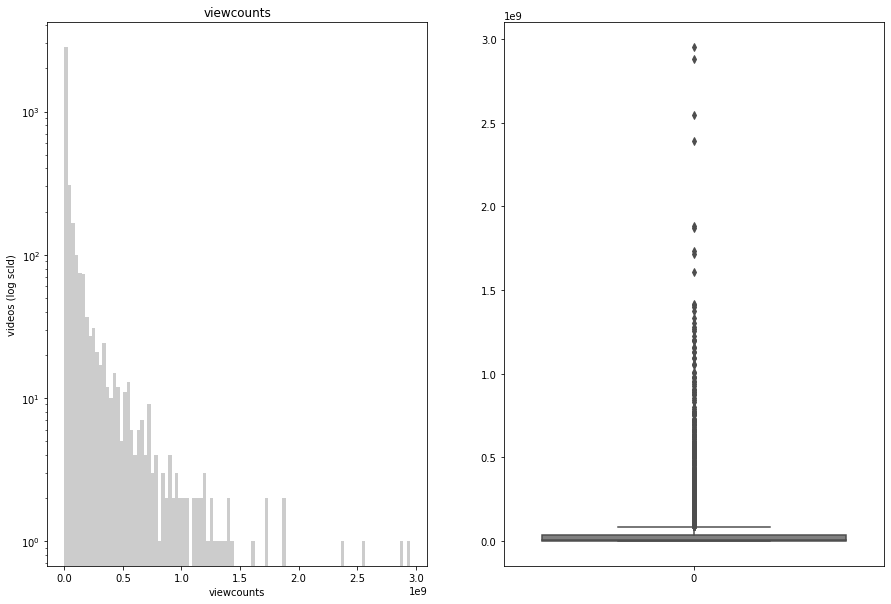

In [67]:
def plot_attribute(key: str, scale: str ='linear', color:str='grey', 
                   figsize:tuple=(15,10), kde: bool =False):
    fig, ax = plt.subplots(nrows=1,ncols=2, figsize=figsize)
    ax[0].set(yscale=scale)
    sns.distplot(df[key].to_numpy(), bins=100, color=color, kde=kde, ax=ax[0])
    ax[0].set_title(key)
    ax[0].set_xlabel(key)
    ax[0].set_ylabel('videos' if scale is 'linear' else 'videos (log scld)')
    
    sns.boxplot(data=df[key].to_numpy(), color=color, ax=ax[1])
    plt.show()
    
plot_attribute('viewcounts', 'log')



#### Least viewed

In [68]:
sorted_views = df.sort_values(by=['viewcounts'], ascending=True)
sorted_views.head()

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
45,-FeCW1JfnCE,30,Future Past,Geneva Jacuzzi,4.0,0.0,82.0,5.0,21
1174,7SgI_9u9A9c,30,В наших глазах,Кино,4.0,0.0,172.0,5.0,42
995,EGGbzLspma4,30,His Name Is Mutty Ranks,A Tribe Called Quest,1.0,0.0,116.0,5.0,85
3331,_Djika1NFco,30,Into Extremes,Clan of Xymox,1.0,0.0,342.0,5.0,131
418,TJEhsSNeTvM,30,Dancing With a Ghost,Valencia,2.0,0.0,212.0,5.0,137


#### Most viewed

In [69]:
sorted_views.tail()[::-1]

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
1224,CevxZvSJLk8,30,Roar,Katy Perry,10337849.0,834301.0,269.0,4.701293,2953194541
2611,lp-EO5I60KA,30,Thinking Out Loud,Ed Sheeran,10733276.0,480611.0,297.0,4.828566,2878210876
719,RBumgq5yVrA,30,Let Her Go,Passenger,9722598.0,325193.0,254.0,4.870542,2546728867
2627,pRpeEdMmmQ0,30,Waka Waka (This Time for Africa),Shakira,9818249.0,641884.0,211.0,4.754541,2391814721
373,uelHwf8o7_U,30,Love The Way You Lie,Eminem,8192551.0,307195.0,267.0,4.855434,1884840765


## Likes

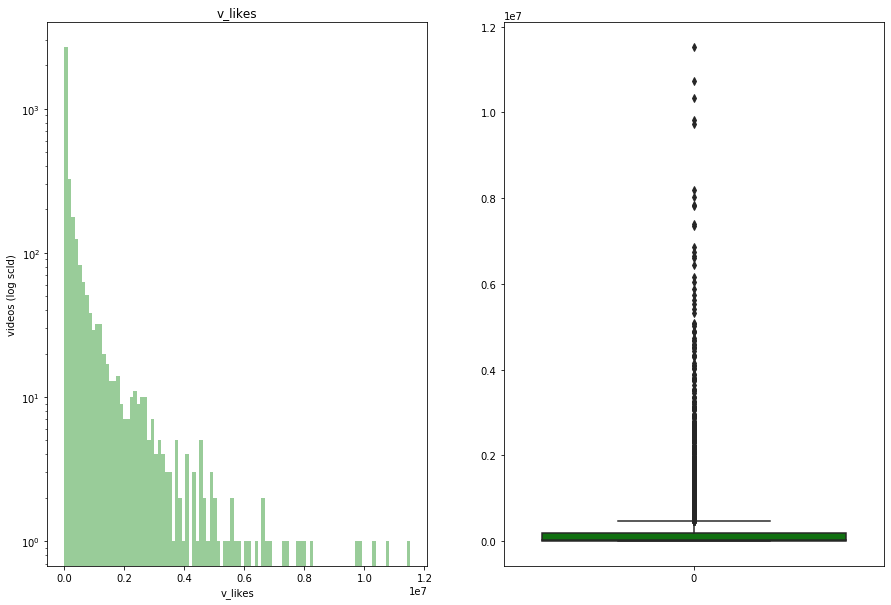

In [70]:
plot_attribute('v_likes', 'log', color='green')

#### Least liked

In [71]:
sorted_likes = df.sort_values(by=['v_likes'], ascending=True)
sorted_likes.head()

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
3247,Q_gJQiUqWok,30,I'm Alive,Blind Guardian,0.0,0.0,361.0,4.962264,31299
2507,R_AQ7AkVzpM,30,Honey,Kara,0.0,0.0,197.0,4.873092,3284903
1926,aPTuKT5st10,30,Flight Being,Bernward Koch,0.0,0.0,260.0,4.780488,59097
1286,pl5pwDpZdu0,30,Regeneration,Stone Temple Pilots,0.0,0.0,241.0,4.863637,3986
3848,HxT9nRZNOiM,30,Bumpkin,Star Slinger,0.0,0.0,227.0,5.000000,10001


#### Most liked

In [72]:
sorted_likes.tail()[::-1]

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
2252,XbGs_qK2PQA,30,Rap God,Eminem,11524278.0,384222.0,369.0,4.870942,979811289
2611,lp-EO5I60KA,30,Thinking Out Loud,Ed Sheeran,10733276.0,480611.0,297.0,4.828566,2878210876
1224,CevxZvSJLk8,30,Roar,Katy Perry,10337849.0,834301.0,269.0,4.701293,2953194541
2627,pRpeEdMmmQ0,30,Waka Waka (This Time for Africa),Shakira,9818249.0,641884.0,211.0,4.754541,2391814721
719,RBumgq5yVrA,30,Let Her Go,Passenger,9722598.0,325193.0,254.0,4.870542,2546728867


## Dislikes

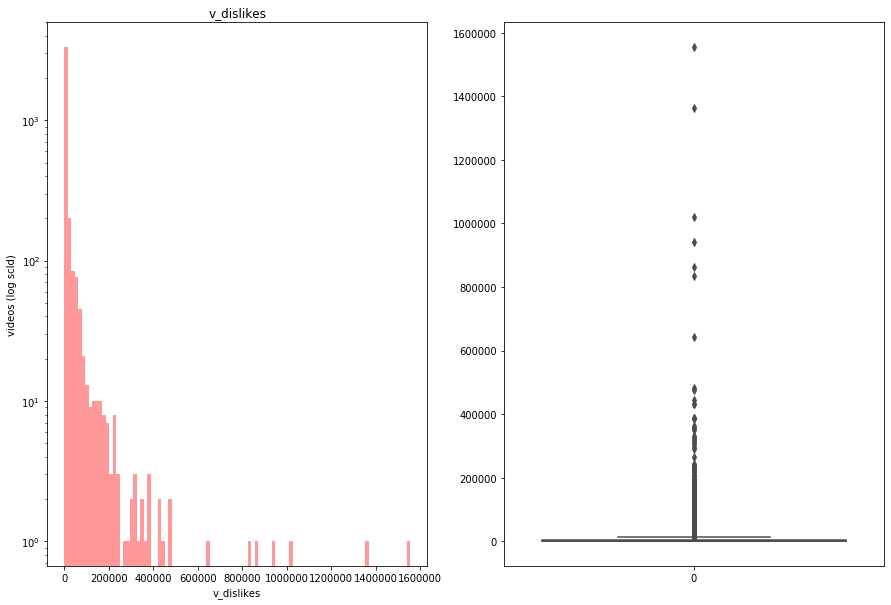

In [73]:
plot_attribute('v_dislikes', 'log', color='red')

#### Least dislikes

In [74]:
sorted_dislikes = df.sort_values(by=['v_dislikes'], ascending=True)
sorted_dislikes.head()

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
2642,8EKukmvMJ1c,30,Three Days in a Row,Anouk,52.0,0.0,260.0,5.000000,3974
350,JlCMAFd-ouQ,30,Old Yellow Bricks,Arctic Monkeys,0.0,0.0,186.0,4.416666,3222
1717,hcsYG9iTeds,30,Yinxianghechengqi,Tortoise,22.0,0.0,155.0,5.000000,4177
2703,-ARxri21y1M,30,Music Was Saved,Starsailor,16.0,0.0,181.0,5.000000,1309
1810,ZP4Wau4z6ug,30,The Supreme Abstract,Blut aus Nord,44.0,0.0,187.0,5.000000,3737


#### Most dislikes

In [75]:
sorted_dislikes.tail()[::-1]

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
2171,My2FRPA3Gf8,30,Wrecking Ball,Miley Cyrus,5419945.0,1555113.0,221.0,4.108186,1055364657
2043,LrUvu1mlWco,30,We Can't Stop,Miley Cyrus,3772655.0,1363910.0,213.0,3.937882,875538230
1091,4GuqB1BQVr4,30,Boyfriend,Justin Bieber,4509750.0,1020224.0,211.0,4.262041,772678855
2834,cwQgjq0mCdE,30,I'm in It,Kanye West,5874003.0,942912.0,130.0,4.446722,515158517
2346,ASO_zypdnsQ,30,Gentleman,Psy,5751485.0,863962.0,233.0,4.477610,1282273617


## Average Rating

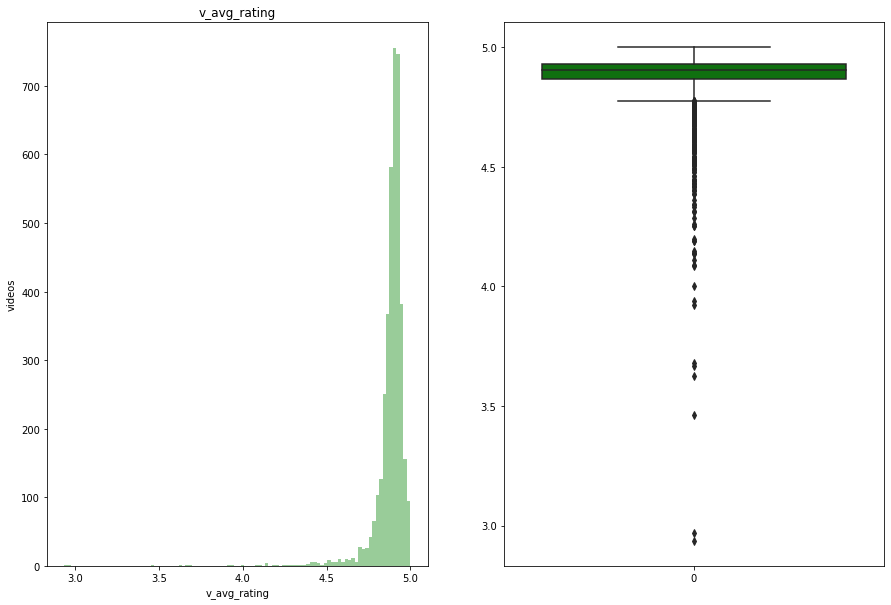

In [76]:
plot_attribute('v_avg_rating', color='green')

## Connections

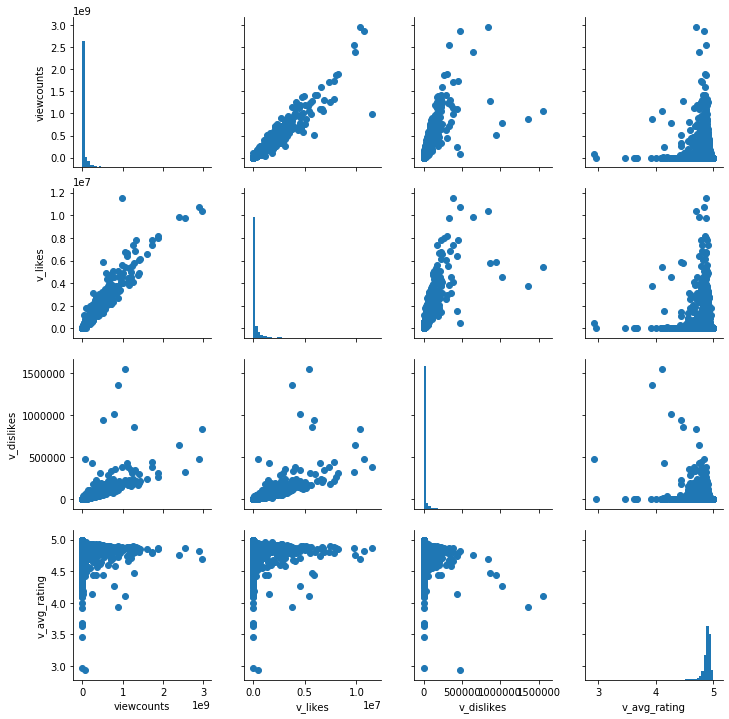

In [77]:
pair_grid = sns.PairGrid(data=df[['viewcounts', 'v_likes', 'v_dislikes', 'v_avg_rating']])
pair_grid.map_offdiag(plt.scatter)
pair_grid.map_diag(plt.hist, bins=50)
plt.show()

## Conclusion




